Variables
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this
client
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last
campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign
Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


In [2]:
df=pd.read_csv('bank-full.csv')

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.shape

(45211, 17)

# target,default,housing,and loan variables will be replaced with 0 & 1 to view correlations


In [6]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [7]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [8]:
df['Target'] = df['Target'].replace('yes',1)
df['Target'] = df['Target'].replace('no',0)

In [9]:
df['default'] = df['default'].replace('yes',1)
df['default'] = df['default'].replace('no',0)
df['housing'] = df['housing'].replace('yes',1)
df['housing'] = df['housing'].replace('no',0)
df['loan'] = df['loan'].replace('yes',1)
df['loan'] = df['loan'].replace('no',0)

In [10]:
#Univariate Analysis - data types of the independent attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [11]:
#Univariate Analysis - description of the independent attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Univariate Analysis:

1.Rows where education is unkown will be droped as they will not have an influentual benenfit on the model.

2.Unkown jobs will be dropped as it will not have an influentual benenfit on the model.

In [12]:
df.shape

(45211, 17)

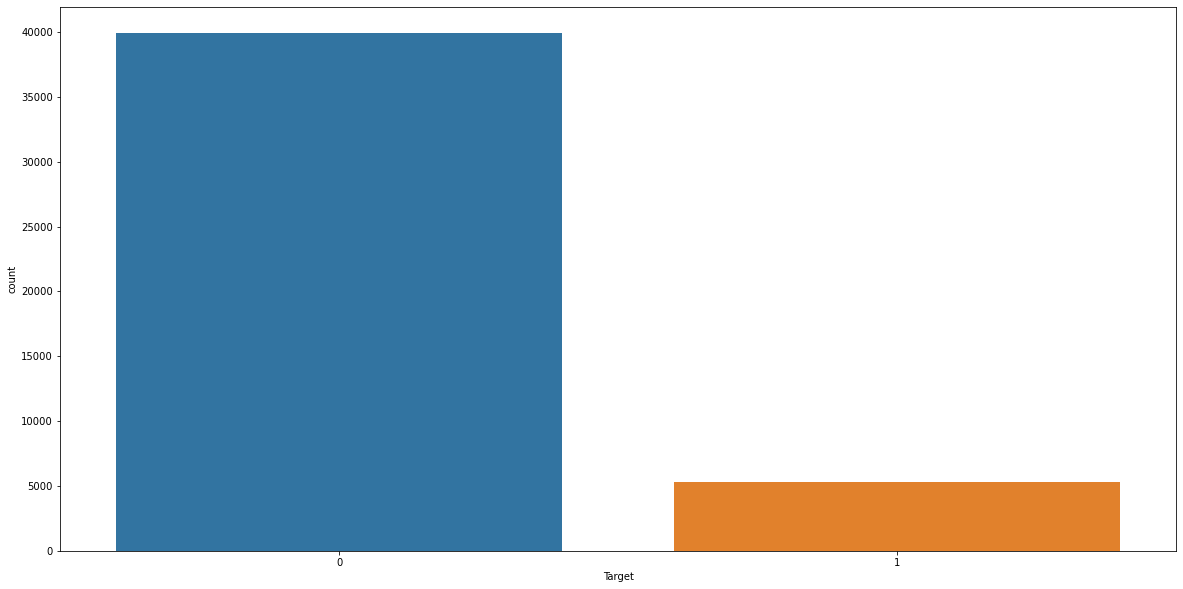

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(df['Target'])

In [14]:
#for clm in df.columns:
    #plt.figure(figsize=(20,10))
    #sns.countplot(df[clm])


In [15]:
#Univariate analysis - missing values in job,education, contact will be replace with the mode for each catagory. 

df['job'] = df['job'].replace('unknown','blue-collar')
df['education'] = df['education'].replace('unknown','secondary')
df['contact'] = df['contact'].replace('unkown','cellular contact')


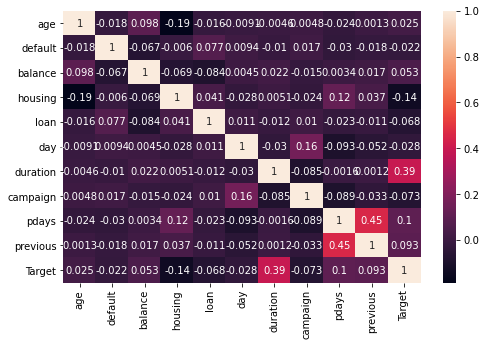

In [16]:
#Multivariate Analysis 
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

In [17]:
df_dum=df

In [18]:
# Df_dum was created converting all catagorical varaiables to unit varaiables. 
#models will be built using bother dataframes to compare performance 


In [19]:
df_dum=pd.get_dummies(df, columns=['job','marital','education','housing','contact','month','poutcome'])

In [20]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [21]:
print(df_dum['poutcome_failure'].corr(df_dum['Target']))
print(df_dum['poutcome_other'].corr(df_dum['Target']))
print(df_dum['poutcome_success'].corr(df_dum['Target']))
print(df_dum['poutcome_other'].corr(df_dum['Target']))
print(df_dum['poutcome_unknown'].corr(df_dum['Target']))

0.009885453006005523
0.03195501086647566
0.30678821065127504
0.03195501086647566
-0.1670506769847746


In [22]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [23]:
(df['pdays']==-1).corr(df['Target'])

-0.16726343965338553

In [24]:
df.drop('poutcome',axis=1,inplace=True)
df.drop('pdays',axis=1,inplace=True)

# pdays & poutcome will be dropped as there unknown values are extremely high
there correlations  to target variable are high but are unkown and will negativley impact the model
it would be too large of an assumption to replace them with mean or mode values. 


In [25]:
df_dum.drop('pdays',axis=1,inplace=True)
df_dum.drop({'poutcome_failure',
             'poutcome_other',
             'poutcome_success',
             'poutcome_other',
             'poutcome_unknown'},axis=1,inplace=True)

-0.1391727024981698

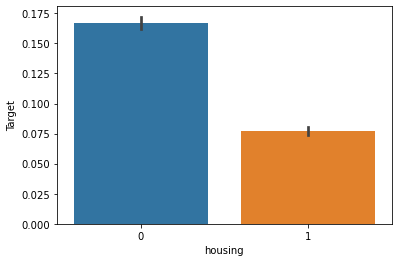

In [26]:
#Bivariate analysis - Those without a housing loan tended not to subscribe to the term deposit
sns.barplot(df['housing'],df['Target'])
df['housing'].corr(df['Target'])

0.39452101589456173

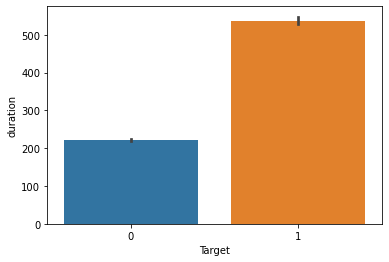

In [27]:
#Bivariate analysis - Those with  a greater duration tended to subscribe to term deposit more often
sns.barplot(df['Target'],df['duration'])
df['duration'].corr(df['Target'])

In [28]:
# Bi-variate analysis
#sns.pairplot(df)

# Deliverable – 2 (Prepare the data for analytics) – (10)


In [29]:
df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
previous      int64
Target        int64
dtype: object

In [30]:
#df['Target']=df['Target'].astype('category')
#df_dum['Target']=df_dum['Target'].astype('category')

In [31]:
df_dum.dtypes

age                    int64
default                int64
balance                int64
loan                   int64
day                    int64
duration               int64
campaign               int64
previous               int64
Target                 int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
housing_0              uint8
housing_1              uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
month_apr              uint8
month_aug              uint8
month_dec              uint8
month_feb     

In [32]:
X=df.drop('Target',axis=1)
X_dum=df_dum.drop('Target',axis=1)
y=df['Target']
y_dum=df_dum['Target']

In [33]:
print(df.shape)
print(X.shape)
print(y.shape)
print(y_dum.shape)

(45211, 15)
(45211, 14)
(45211,)
(45211,)


In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)
X_dum_train,X_dum_test,y_dum_train,y_dum_test=train_test_split(X_dum,y_dum, test_size =0.3 , random_state=2)

# Deliverable – 3 (create the ensemble model) – (30)

df_dum will have to be used to create a logistic regression model since logistic reggression 
models can not use object data types

In [35]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(solver='liblinear')

logmod_dum=logreg.fit(X_dum_train,y_dum_train)

y_predict_dum= logmod_dum.predict(X_dum_test)

In [36]:
coef_df_dum=pd.DataFrame(logmod_dum.coef_)
coef_df_dum['intercept']=logmod_dum.intercept_
print(coef_df_dum)

          0         1         2         3         4         5         6  \
0  0.001834 -0.175991  0.000013 -0.521598  0.011904  0.004131 -0.130244   

          7         8         9  ...        33       34        35        36  \
0  0.076815  0.114006 -0.271237  ... -0.306737 -1.27061 -1.007279  0.319153   

         37        38        39        40        41  intercept  
0  1.384075 -0.589916 -1.155549  0.965936  0.894713  -1.249065  

[1 rows x 43 columns]


Trainig accuracy 0.8944923689449237

Testing accuracy 0.8954585667944559

Recall: 0.28753993610223644

Precision: 0.5976095617529881

F1 Score: 0.3882657463330457

Roc Auc Score: 0.6311439158801039


,Method,accuracy
0,Logistic Regression,0.895459


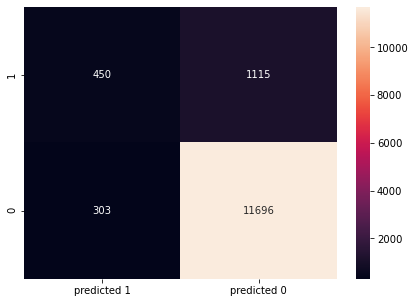

In [37]:
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(y_dum_test,y_predict_dum, labels=[1,0])
log_cm=pd.DataFrame(cm,index = ["1",'0'],columns=['predicted 1','predicted 0'])
plt.figure(figsize=(7,5))
sns.heatmap(log_cm,annot=True,fmt='g')

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

print("Trainig accuracy",logmod_dum.score(X_dum_train,y_dum_train))  
print()
print("Testing accuracy",logmod_dum.score(X_dum_test, y_dum_test))
print()
print("Recall:",recall_score(y_dum_test,y_predict_dum))
print()
print("Precision:",precision_score(y_dum_test,y_predict_dum))
print()
print("F1 Score:",f1_score(y_dum_test,y_predict_dum))
print()
print("Roc Auc Score:",roc_auc_score(y_dum_test,y_predict_dum))

acc_log=accuracy_score(y_dum_test,y_predict_dum)

acc_log
resultsDf = pd.DataFrame({'Method':["Logistic Regression"], 'accuracy': acc_log})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf


In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini')
tree_dum=dtree.fit(X_dum_train,y_dum_train)
y_dumtree_predict=tree_dum.predict(X_dum_test)


Trainig accuracy 0.8944923689449237

Testing accuracy 0.8954585667944559

Recall: 0.48242811501597443

Precision: 0.45182525433871934

F1 Score: 0.4666254635352287

Roc Auc Score: 0.7030442100206965


,Method,accuracy
0,Logistic Regression,0.895459
0,Decision Tree,0.872751


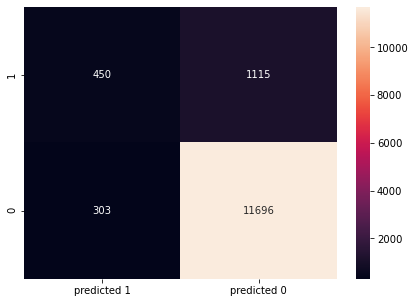

In [39]:
from sklearn.metrics import confusion_matrix
cm2=metrics.confusion_matrix(y_dum_test,y_dumtree_predict, labels=[1,0])
log_cm2=pd.DataFrame(cm2,index = ["1",'0'],columns=['predicted 1','predicted 0'])
plt.figure(figsize=(7,5))
sns.heatmap(log_cm,annot=True,fmt='g')

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

print("Trainig accuracy",logmod_dum.score(X_dum_train,y_dum_train))  
print()
print("Testing accuracy",logmod_dum.score(X_dum_test, y_dum_test))
print()
print("Recall:",recall_score(y_dum_test,y_dumtree_predict))
print()
print("Precision:",precision_score(y_dum_test,y_dumtree_predict))
print()
print("F1 Score:",f1_score(y_dum_test,y_dumtree_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_dum_test,y_dumtree_predict))

acc_DT=accuracy_score(y_dum_test,y_dumtree_predict)

tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc_DT]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

      train      test
2  0.885329   0.88381
3  0.889279  0.888381
4  0.891427  0.887644
5  0.896673  0.892804
6  0.900938  0.893468
7  0.906911  0.892067
8   0.91244  0.891699
9  0.918886  0.889929


Text(0.5, 0, 'max depth')

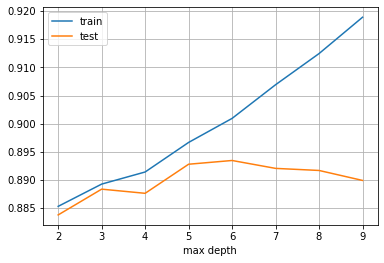

In [40]:
#best max depth
acc_depth = pd.DataFrame(index=range(2,10), columns=['train','test'])
for depth in range(2, 10):
    # Store accuracy of decision tree model on train data for different max depths
    clf_depth =DecisionTreeClassifier(criterion = "gini", random_state = 1,
                               max_depth=depth)
    clf_depth.fit(X_dum_train, y_dum_train)
    preds_clf_train = clf_depth.predict(X_dum_train)
    acc_depth.loc[depth, 'train'] = accuracy_score(y_dum_train, preds_clf_train)
    
    # Do the same for test data
    preds_clf_test = clf_depth.predict(X_dum_test)
    acc_depth.loc[depth, 'test'] = accuracy_score(y_dum_test, preds_clf_test)

print(acc_depth)

acc_depth.plot()
plt.grid()
plt.xlabel('max depth')

      train      test
1  0.902297  0.891772
2  0.902234  0.891994
3  0.902076  0.891846
4  0.901886  0.892067
5   0.90157  0.891551
6  0.901539  0.891625
7  0.901507  0.891551
8   0.90157  0.891699
9  0.901665  0.891772


Text(0.5, 0, 'min leaf')

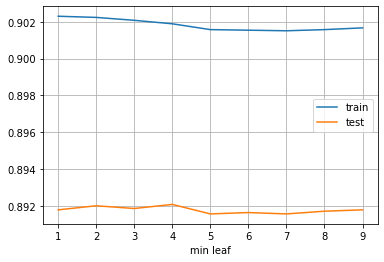

In [41]:
#best min leaf sample
acc_leaf = pd.DataFrame(index=range(1,10), columns=['train','test'])
for leaf in range(1, 10):
    # Store accuracy of decision tree model on train data for different max leaf s
    clf_leaf = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=7, min_samples_leaf=leaf)
    clf_leaf.fit(X_dum_train, y_dum_train)
    preds_clf_train = clf_leaf.predict(X_dum_train)
    acc_leaf.loc[leaf, 'train'] = accuracy_score(y_dum_train, preds_clf_train)
    
    # Do the same for test data
    preds_clf_test = clf_leaf.predict(X_dum_test)
    acc_leaf.loc[leaf, 'test'] = accuracy_score(y_dum_test, preds_clf_test)

print(acc_leaf)
acc_leaf.plot()
plt.grid()
plt.xlabel('min leaf')

Trainig accuracy 0.9007172875786015

Testing accuracy 0.893246829843704

Recall: 0.42875399361022365

Precision: 0.5477551020408163

F1 Score: 0.48100358422939066

Roc Auc Score: 0.6912917397003531


,Method,accuracy
0,Logistic Regression,0.895459
0,Decision Tree,0.872751
0,Prunned DT,0.891772


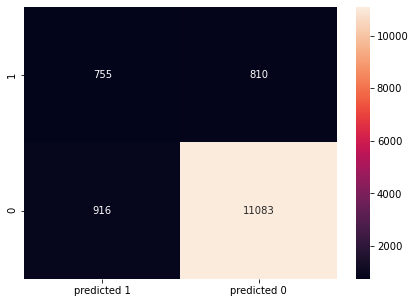

In [42]:
#to prevent over fit the best min_leaf_sample would be 4
BestDT =DecisionTreeClassifier(criterion = "gini", random_state = 1,
                               max_depth=6,min_samples_leaf=4)
bestmod=BestDT.fit(X_dum_train,y_dum_train)
best_y_pred=bestmod.predict(X_dum_test)
cm3=metrics.confusion_matrix(y_dum_test,y_dumtree_predict, labels=[1,0])
log_cm3=pd.DataFrame(cm3,index = ["1",'0'],columns=['predicted 1','predicted 0'])
plt.figure(figsize=(7,5))
sns.heatmap(log_cm3,annot=True,fmt='g')

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

print("Trainig accuracy",bestmod.score(X_dum_train,y_dum_train))  
print()
print("Testing accuracy",bestmod.score(X_dum_test, y_dum_test))
print()
print("Recall:",recall_score(y_dum_test,best_y_pred))
print()
print("Precision:",precision_score(y_dum_test,best_y_pred))
print()
print("F1 Score:",f1_score(y_dum_test,best_y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_dum_test,best_y_pred))

acc_PDT =accuracy_score(y_dum_test,preds_clf_test)
tempResultsDf = pd.DataFrame({'Method':['Prunned DT'], 'accuracy': [acc_PDT]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf


# 1.BaggingClassifier

In [43]:
#complex model is used for the base etimator when using the bagging classifier ensemble technique
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=tree_dum, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_dum_train, y_dum_train)

0.8984812739604836
Trainig accuracy 0.9995576199955762

Testing accuracy 0.8984812739604836

Recall: 0.45559105431309904

Precision: 0.5759289176090469

F1 Score: 0.5087406350338922

Roc Auc Score: 0.7059187040879604


,Method,accuracy
0,Logistic Regression,0.895459
0,Decision Tree,0.872751
0,Prunned DT,0.891772
0,Bagging,0.898481


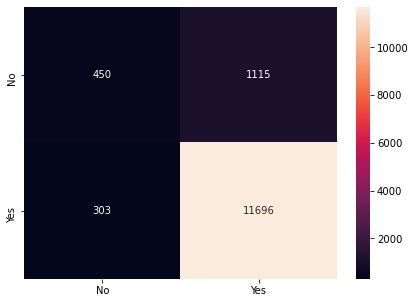

In [44]:
bgcl_y_predict = bgcl.predict(X_dum_test)
print(bgcl.score(X_dum_test , y_dum_test))

cm4=metrics.confusion_matrix(y_test, bgcl_y_predict,labels=[0, 1])

df_cm4 = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm4, annot=True ,fmt='g')


print("Trainig accuracy",bgcl.score(X_dum_train,y_dum_train))  
print()
print("Testing accuracy",bgcl.score(X_dum_test, y_dum_test))
print()
print("Recall:",recall_score(y_dum_test,bgcl_y_predict))
print()
print("Precision:",precision_score(y_dum_test,bgcl_y_predict))
print()
print("F1 Score:",f1_score(y_dum_test,bgcl_y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_dum_test,bgcl_y_predict))

acc_bag=accuracy_score(y_dum_test,bgcl_y_predict)

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_bag]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

# 2.AdaBoostClassifier

In [45]:
#simple model (BestDT) is used for the base etimator when using the boosting classifier ensemble technique
from sklearn.ensemble import AdaBoostClassifier
ADA1=AdaBoostClassifier(base_estimator=BestDT,n_estimators=50,random_state=1)
Aboost=ADA1.fit(X_dum_train,y_dum_train)
y_pred_Aboost=Aboost.predict(X_dum_test)

Trainig accuracy 0.9719088697190887

Testing accuracy 0.8908139191978768

Recall: 0.45431309904153355

Precision: 0.531390134529148

F1 Score: 0.48983809851877375

Roc Auc Score: 0.7010293722559948


,Method,accuracy
0,Logistic Regression,0.895459
0,Decision Tree,0.872751
0,Prunned DT,0.891772
0,Bagging,0.898481
0,Ada Boost,0.890814


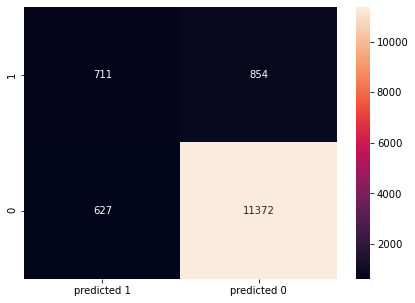

In [46]:
cm5=metrics.confusion_matrix(y_dum_test,y_pred_Aboost, labels=[1,0])
ada_cm=pd.DataFrame(cm5,index = ["1",'0'],columns=['predicted 1','predicted 0'])
plt.figure(figsize=(7,5))
sns.heatmap(ada_cm,annot=True,fmt='g')
print("Trainig accuracy",ADA1.score(X_dum_train,y_dum_train))  
print()
print("Testing accuracy",ADA1.score(X_dum_test, y_dum_test))
print()
print("Recall:",recall_score(y_dum_test,y_pred_Aboost))
print()
print("Precision:",precision_score(y_dum_test,y_pred_Aboost))
print()
print("F1 Score:",f1_score(y_dum_test,y_pred_Aboost))
print()
print("Roc Auc Score:",roc_auc_score(y_dum_test,y_pred_Aboost))

acc_ADA=accuracy_score(y_dum_test,y_pred_Aboost)

tempResultsDf = pd.DataFrame({'Method':['Ada Boost'], 'accuracy': [acc_ADA]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

# 3.RandomForestClassifier

Trainig accuracy 0.8880778588807786

Testing accuracy 0.8873488646416986

Recall: 0.03450479233226837

Precision: 0.7605633802816901

F1 Score: 0.06601466992665038

Roc Auc Score: 0.5165440038001037


,Method,accuracy
0,Logistic Regression,0.895459
0,Decision Tree,0.872751
0,Prunned DT,0.891772
0,Bagging,0.898481
0,Ada Boost,0.890814
0,Random Forest,0.887349


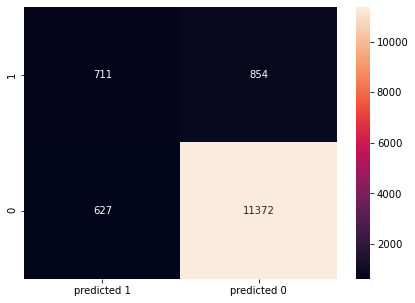

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=8)

RF=RF.fit(X_dum_train,y_dum_train)
y_predict_RF=RF.predict(X_dum_test)

cm6=metrics.confusion_matrix(y_dum_test,y_predict_RF, labels=[1,0])
ada_cm=pd.DataFrame(cm5,index = ["1",'0'],columns=['predicted 1','predicted 0'])
plt.figure(figsize=(7,5))
sns.heatmap(ada_cm,annot=True,fmt='g')
print("Trainig accuracy",RF.score(X_dum_train,y_dum_train))  
print()
print("Testing accuracy",RF.score(X_dum_test, y_dum_test))
print()
print("Recall:",recall_score(y_dum_test,y_predict_RF))
print()
print("Precision:",precision_score(y_dum_test,y_predict_RF))
print()
print("F1 Score:",f1_score(y_dum_test,y_predict_RF))
print()
print("Roc Auc Score:",roc_auc_score(y_dum_test,y_predict_RF))

acc_RF=accuracy_score(y_dum_test,y_predict_RF)

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

In [1]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))

roc.fit(X_dum_train, y_dum_train)
roc.score(X_dum_test, y_dum_test)
roc

ModuleNotFoundError: No module named 'yellowbrick'

# Model Comparision

In [ ]:
resultsDf

All models performed very well with accuracies in the high 0.80's. The logistic regression model seems to have achieved the highest accuracy score when compared to testing data. The Decision tree model with default parameters performed the worst. Once ensemble techniques were run on the data set, the accuracy increased by .02. I believe the logistic model performed the best is due to the high number of categorical variables in the data set that could be perfectly replicated by a logistical regression line. 

# Git Hub URL:
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-c4bantle/blob/master/Project%20-%20Term%20Deposit%20Sale%20-%20Clayton%20Bantle%20.ipynb